In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
class InfiniteVariance:
    def series_gen(self):
        trajectory = []
        while(True):
            # 0-left 1-right
            if(random.random() < 0.5):
                #chossing to go right
                trajectory.append((0,0,0))
                break
            else:
                #going left frends
                if(random.random() < 0.9):
                    trajectory.append((0,0,1))
                else:
                    trajectory.append((0,1,1))
                    break
        return trajectory
    
    def MC(self):
        q = np.zeros((2,2))
        c = np.zeros((2,2))
        
        for _ in range(100000):
            trajectory = self.series_gen()
            g = 0
            w = 1
            for (state, reward, action) in trajectory:
                g = g + reward
                c[state, action] += w
                q[state, action] += w*(g-q[state, action])/c[state, action]
                if(action == 0):
                    w = 0
                else:
                    w = 2*w
        
        v = np.zeros(2)
        v[0] = (q[0,0] + q[0,1])/2
        
        return v

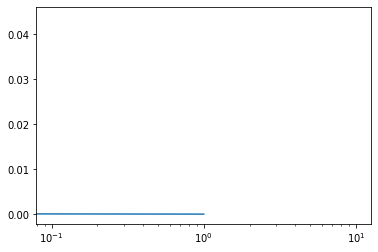

In [14]:
inf = InfiniteVariance()
values = inf.MC()

plt.plot(values)
plt.xscale('log')